<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#pT,-eta" data-toc-modified-id="pT,-eta-1">pT, eta</a></span></li><li><span><a href="#Neutral-energy-fraction" data-toc-modified-id="Neutral-energy-fraction-2">Neutral energy fraction</a></span></li><li><span><a href="#d0-of-tracks-inside-leptonJet-(max,-min)" data-toc-modified-id="d0-of-tracks-inside-leptonJet-(max,-min)-3">d0 of tracks inside leptonJet (max, min)</a></span></li><li><span><a href="#Isolation-(track-,-pfcand-)" data-toc-modified-id="Isolation-(track-,-pfcand-)-4">Isolation (track-, pfcand-)</a></span></li><li><span><a href="#ptDistribution,-dRSpread-(EtaPhiDistribution)" data-toc-modified-id="ptDistribution,-dRSpread-(EtaPhiDistribution)-5">ptDistribution, dRSpread (EtaPhiDistribution)</a></span></li><li><span><a href="#[jetsub]-$\lambda,-\epsilon$-|-pT,energy-distribution" data-toc-modified-id="[jetsub]-$\lambda,-\epsilon$-|-pT,energy-distribution-6">[jetsub] $\lambda, \epsilon$ | pT,energy distribution</a></span></li><li><span><a href="#[jetsub]-Energy-correlation-function-variables-{e1,-e2,-e3}" data-toc-modified-id="[jetsub]-Energy-correlation-function-variables-{e1,-e2,-e3}-7">[jetsub] Energy correlation function variables {e1, e2, e3}</a></span></li></ul></div>

Locate promising variables to discrimnate true signals to fake signals and misreconstructed backgrounds.

Plots contain multiple categories (All normalized):
+ 4mu true
+ 4mu fake
+ 2mu2e true
+ 2mu2e fake
+ QCD
+ diboson
+ triboson
+ DYJetsToLL
+ TTJets
- - - 

**variables summary**
1. pT
2. eta
3. neutral energy fraction
4. maxd0
5. mind0
6. tkIso
7. pfIso
8. pT distribution
9. etaPhi distribution
10. substructure momentum distribution
11. substructure energy distribution
12. ECF e1
13. ECF e2
14. ECF e3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
from uproot_methods import TLorentzVectorArray
from histbook import *

import utils.uprootHelpers as uuh
import utils.commonHelpers as uch
import utils.histoHelpers as uhh
from utils.SignalDescription import SignalDescription
from utils.BackgroundDescription import BackgroundDescription

from functools import reduce, partial

plt.style.use('default')
plt.rcParams.update(uhh.ffPltStyleSettings)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
sd = SignalDescription()
sig4mu = sd.files('4mu', grouped=True, nth=-1)
sig2mu2e = sd.files('2mu2e', grouped=True, nth=-1)

sigfs4mu   = [f for x in sig4mu.values() for f in x]
sigfs2mu2e = [f for x in sig2mu2e.values() for f in x]

bd = BackgroundDescription()
BkgStore = bd.getTotalFileWeights(groupby='tag', nth=-1)

### pT, eta

In [3]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        self['lj_m'] = lambda: jetp4[jetMatchIdx][self.mHLT]
        self['lj_u'] = lambda: jetp4[jetUnmatchedMask][self.mHLT]
        
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        self['jetp4'] = lambda: uuh.p4Array(t['pfjet_p4'])[self.mHLT]        

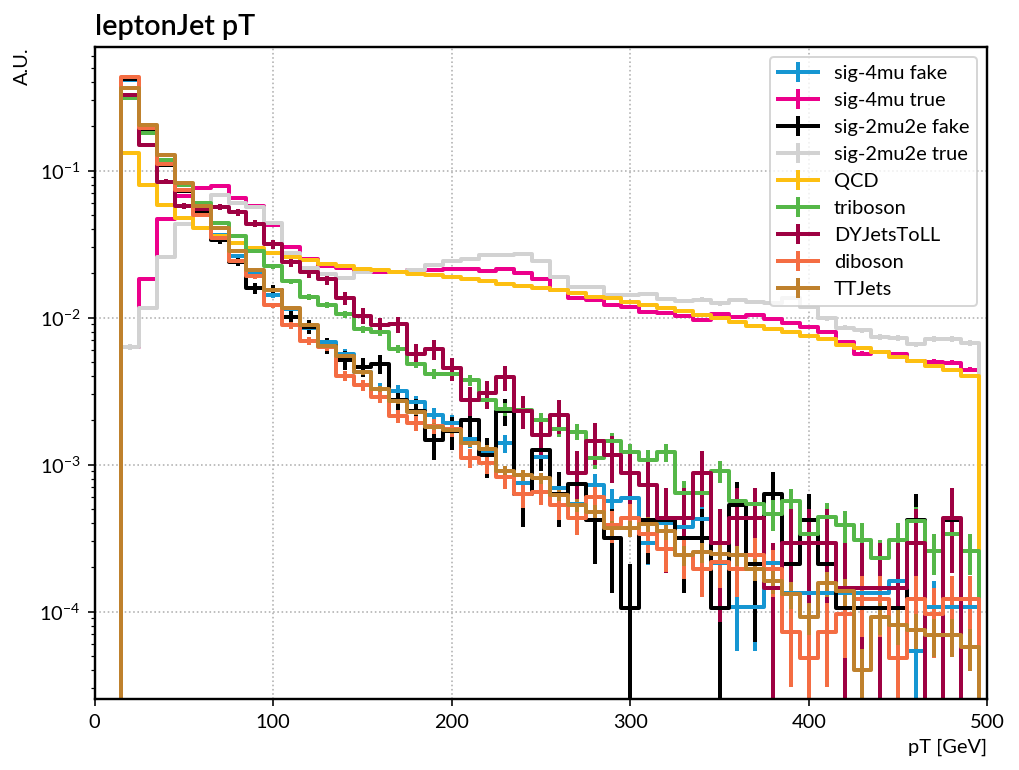

In [4]:
hs = dict()
fig, ax = plt.subplots(figsize=(8,6))
def fillpt(d): return d.pt.flatten()

hPt = Hist(bin('x', 50, 0, 500))
hs['sig-4mu fake'  ] = uhh.MultiFill(hPt, loadedSig, 'lj_u', fillpt, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hPt, loadedSig, 'lj_m', fillpt, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hPt, loadedSig, 'lj_u', fillpt, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hPt, loadedSig, 'lj_m', fillpt, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hPt, loadedBkg, 'jetp4', fillpt, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='pT [GeV]',
    ylabel='A.U.',
    title='leptonJet pT'
);

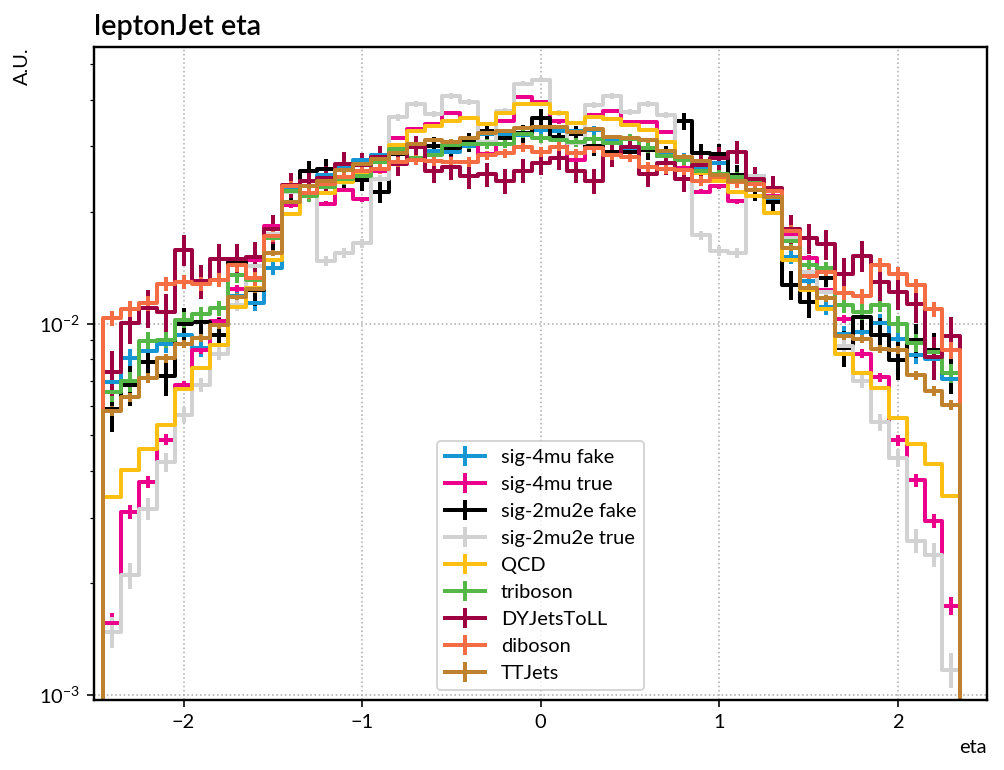

In [5]:
hs = dict()
fig, ax = plt.subplots(figsize=(8,6))
def filleta(d): return d.eta.flatten()

hEta = Hist(bin('x', 50, -2.5, 2.5))
hs['sig-4mu fake'  ] = uhh.MultiFill(hEta, loadedSig, 'lj_u', filleta, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hEta, loadedSig, 'lj_m', filleta, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hEta, loadedSig, 'lj_u', filleta, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hEta, loadedSig, 'lj_m', filleta, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hEta, loadedBkg, 'jetp4', filleta, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='eta',
    ylabel='A.U.',
    title='leptonJet eta'
);

### Neutral energy fraction

In [6]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        neutralEnergyFrac = lambda: (
            t['pfjet_neutralEmE'].array()
            +t['pfjet_neutralHadronE'].array()
        )/jetp4.energy
        
        self['neufrac_u'] = lambda: neutralEnergyFrac()[jetUnmatchedMask][self.mHLT]
        self['neufrac_m'] = lambda: neutralEnergyFrac()[jetMatchIdx][self.mHLT]
        
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        neutralEnergyFrac = lambda: (
            t['pfjet_neutralEmE'].array()
            +t['pfjet_neutralHadronE'].array()
        )/jetp4.energy
        self['neufrac'] = lambda: neutralEnergyFrac()[self.mHLT]        

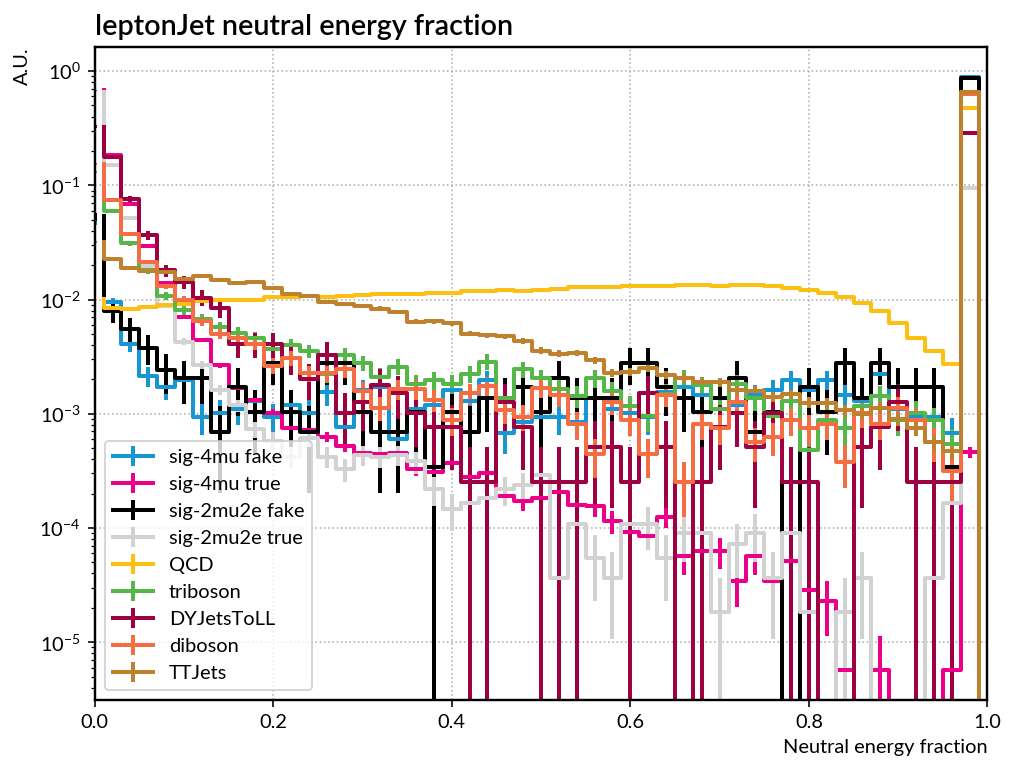

In [7]:
hs = dict()
fig, ax = plt.subplots(figsize=(8,6))
def doFill(d): return d.flatten()

hFrac = Hist(bin('x', 50, 0, 1))
hs['sig-4mu fake'  ] = uhh.MultiFill(hFrac, loadedSig, 'neufrac_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hFrac, loadedSig, 'neufrac_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hFrac, loadedSig, 'neufrac_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hFrac, loadedSig, 'neufrac_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hFrac, loadedBkg, 'neufrac', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='Neutral energy fraction',
    ylabel='A.U.',
    title='leptonJet neutral energy fraction'
);

### d0 of tracks inside leptonJet (max, min)

In [8]:
def pickExtreme(ja, maxmin):
    if ja.size==0: return np.array([])
    _ja = np.abs(ja[~np.isnan(ja)])
    if maxmin == 'max':
        _res = _ja[_ja.argmax()]
    if maxmin == 'min':
        _res = _ja[_ja.argmin()]
    cnts = _res.count()
    res = np.zeros(len(_res), dtype='float32')
    singletonIdx, zerotonIdx = np.where(cnts==1), np.where(cnts==0)
    res[singletonIdx] = _res[singletonIdx]
    res[zerotonIdx] = np.nan
    return res

class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        candTkd0 = lambda: uuh.NestNestObjArrayToJagged(t['pfjet_pfcand_tkD0'].array())
        self['maxd0_u'] = lambda: pickExtreme(candTkd0()[jetUnmatchedMask][self.mHLT].flatten(), 'max')
        self['maxd0_m'] = lambda: pickExtreme(candTkd0()[jetMatchIdx][self.mHLT].flatten(), 'max')
        self['mind0_u'] = lambda: pickExtreme(candTkd0()[jetUnmatchedMask][self.mHLT].flatten(), 'min')
        self['mind0_m'] = lambda: pickExtreme(candTkd0()[jetMatchIdx][self.mHLT].flatten(), 'min')

class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        candTkd0 = lambda: uuh.NestNestObjArrayToJagged(t['pfjet_pfcand_tkD0'].array())
        self['maxd0'] = lambda: pickExtreme(candTkd0()[self.mHLT].flatten(), 'max')
        self['mind0'] = lambda: pickExtreme(candTkd0()[self.mHLT].flatten(), 'min')

Exception occurred in `MultiFill(histo, loaderCls, dataKey, fillingMethod, filelist, weight=None, benchKey=None, ax='x', weightax='w', strategy=<class 'concurrent.futures.process.ProcessPoolExecutor'>)`
-------------------------------------------------------------
Msg:  zero-size array to reduction operation maximum which has no identity
Exception occurred in `MultiFill(histo, loaderCls, dataKey, fillingMethod, filelist, weight=None, benchKey=None, ax='x', weightax='w', strategy=<class 'concurrent.futures.process.ProcessPoolExecutor'>)`
-------------------------------------------------------------
Msg:  zero-size array to reduction operation maximum which has no identity


/uscms/home/wsi/nobackup/miniconda3/envs/ffAna/lib/python3.7/site-packages/histbook/proj.py:600: RuntimeWarning: invalid value encountered in multiply
  correction = total * shaped
/uscms/home/wsi/nobackup/miniconda3/envs/ffAna/lib/python3.7/site-packages/histbook/proj.py:601: RuntimeWarning: invalid value encountered in true_divide
  out[:, countindex] /= correction
/uscms/home/wsi/nobackup/miniconda3/envs/ffAna/lib/python3.7/site-packages/histbook/proj.py:603: RuntimeWarning: invalid value encountered in true_divide
  out[:, errorindex] /= correction


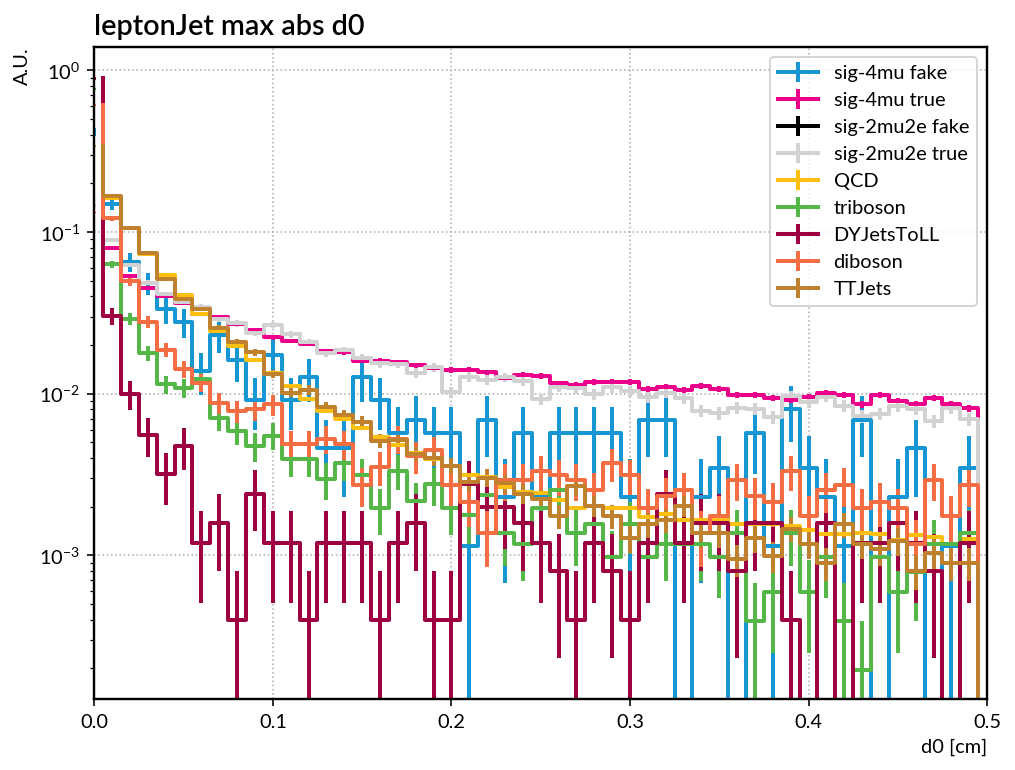

In [9]:
hs = dict()
def doFill(d): return d
fig, ax = plt.subplots(figsize=(8,6))
hD0 = Hist(bin('x', 50, 0, 0.5))

hs['sig-4mu fake'  ] = uhh.MultiFill(hD0, loadedSig, 'maxd0_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hD0, loadedSig, 'maxd0_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hD0, loadedSig, 'maxd0_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hD0, loadedSig, 'maxd0_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hD0, loadedBkg, 'maxd0', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='d0 [cm]',
    ylabel='A.U.',
    title='leptonJet max abs d0'
);

Exception occurred in `MultiFill(histo, loaderCls, dataKey, fillingMethod, filelist, weight=None, benchKey=None, ax='x', weightax='w', strategy=<class 'concurrent.futures.process.ProcessPoolExecutor'>)`
-------------------------------------------------------------
Msg:  zero-size array to reduction operation maximum which has no identity
Exception occurred in `MultiFill(histo, loaderCls, dataKey, fillingMethod, filelist, weight=None, benchKey=None, ax='x', weightax='w', strategy=<class 'concurrent.futures.process.ProcessPoolExecutor'>)`
-------------------------------------------------------------
Msg:  zero-size array to reduction operation maximum which has no identity


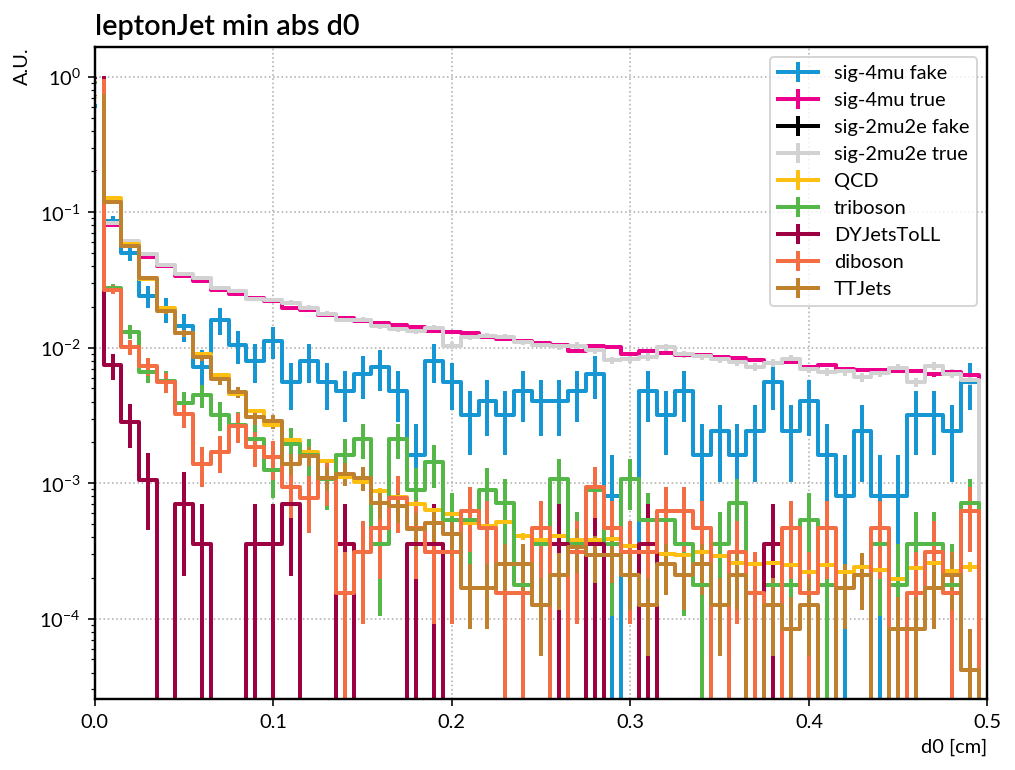

In [10]:
hs = dict()
def doFill(d): return d
fig, ax = plt.subplots(figsize=(8,6))
hD0 = Hist(bin('x', 50, 0, 0.5))

hs['sig-4mu fake'  ] = uhh.MultiFill(hD0, loadedSig, 'mind0_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hD0, loadedSig, 'mind0_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hD0, loadedSig, 'mind0_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hD0, loadedSig, 'mind0_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hD0, loadedBkg, 'mind0', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='d0 [cm]',
    ylabel='A.U.',
    title='leptonJet min abs d0'
);

### Isolation (track-, pfcand-)

In [11]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        self['tkiso_u'] = lambda: self.tree['pfjet_tkIsolation05'].array()[jetUnmatchedMask][self.mHLT]
        self['tkiso_m'] = lambda: self.tree['pfjet_tkIsolation05'].array()[jetMatchIdx][self.mHLT]
        self['pfiso_u'] = lambda: self.tree['pfjet_pfIsolation05'].array()[jetUnmatchedMask][self.mHLT]
        self['pfiso_m'] = lambda: self.tree['pfjet_pfIsolation05'].array()[jetMatchIdx][self.mHLT]
        
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        self['tkiso'] = lambda: self.tree['pfjet_tkIsolation05'].array()[self.mHLT]
        self['pfiso'] = lambda: self.tree['pfjet_pfIsolation05'].array()[self.mHLT]        

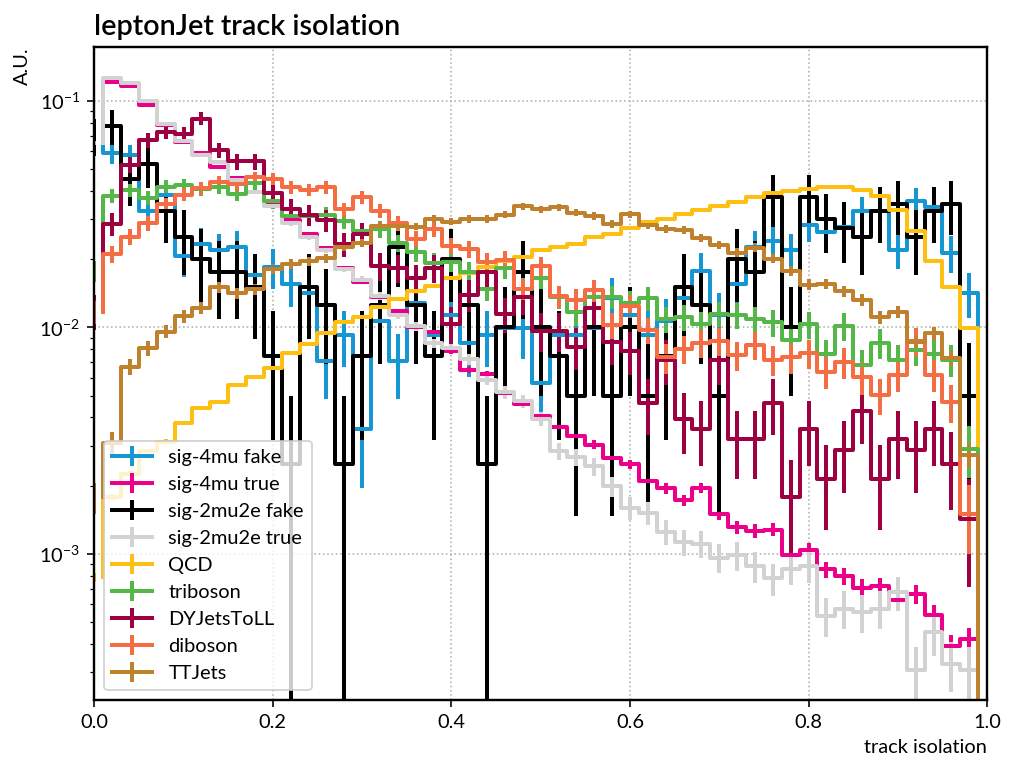

In [12]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hIso = Hist(bin('x', 50, 0, 1))

hs['sig-4mu fake'  ] = uhh.MultiFill(hIso, loadedSig, 'tkiso_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hIso, loadedSig, 'tkiso_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hIso, loadedSig, 'tkiso_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hIso, loadedSig, 'tkiso_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hIso, loadedBkg, 'tkiso', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='track isolation',
    ylabel='A.U.',
    title='leptonJet track isolation'
);

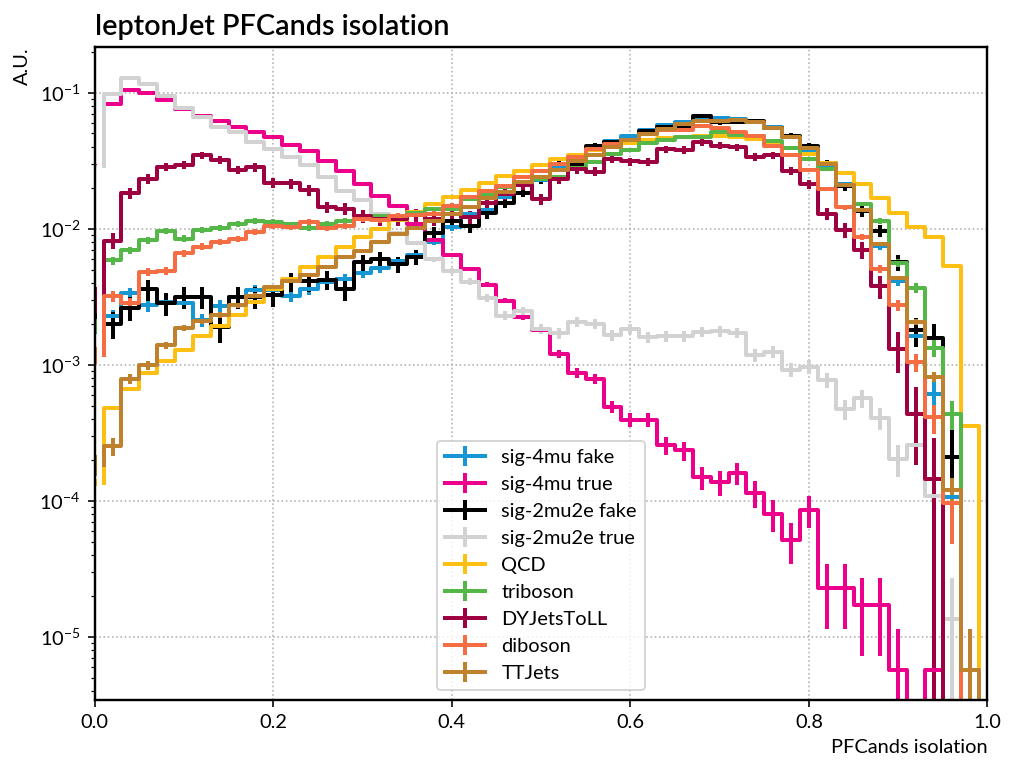

In [13]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hIso = Hist(bin('x', 50, 0, 1))

hs['sig-4mu fake'  ] = uhh.MultiFill(hIso, loadedSig, 'pfiso_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hIso, loadedSig, 'pfiso_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hIso, loadedSig, 'pfiso_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hIso, loadedSig, 'pfiso_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hIso, loadedBkg, 'pfiso', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='PFCands isolation',
    ylabel='A.U.',
    title='leptonJet PFCands isolation'
);

### ptDistribution, dRSpread (EtaPhiDistribution)

In [14]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        self['ptdist_u'] = lambda: t['pfjet_ptDistribution'].array()[jetUnmatchedMask][self.mHLT]
        self['ptdist_m'] = lambda: t['pfjet_ptDistribution'].array()[jetMatchIdx][self.mHLT]
        self['drspread_u'] = lambda: t['pfjet_dRSpread'].array()[jetUnmatchedMask][self.mHLT]
        self['drspread_m'] = lambda: t['pfjet_dRSpread'].array()[jetMatchIdx][self.mHLT]
        
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        self['ptspread'] = lambda: t['pfjet_ptDistribution'].array()[self.mHLT]
        self['drspread'] = lambda: t['pfjet_dRSpread'].array()[self.mHLT]

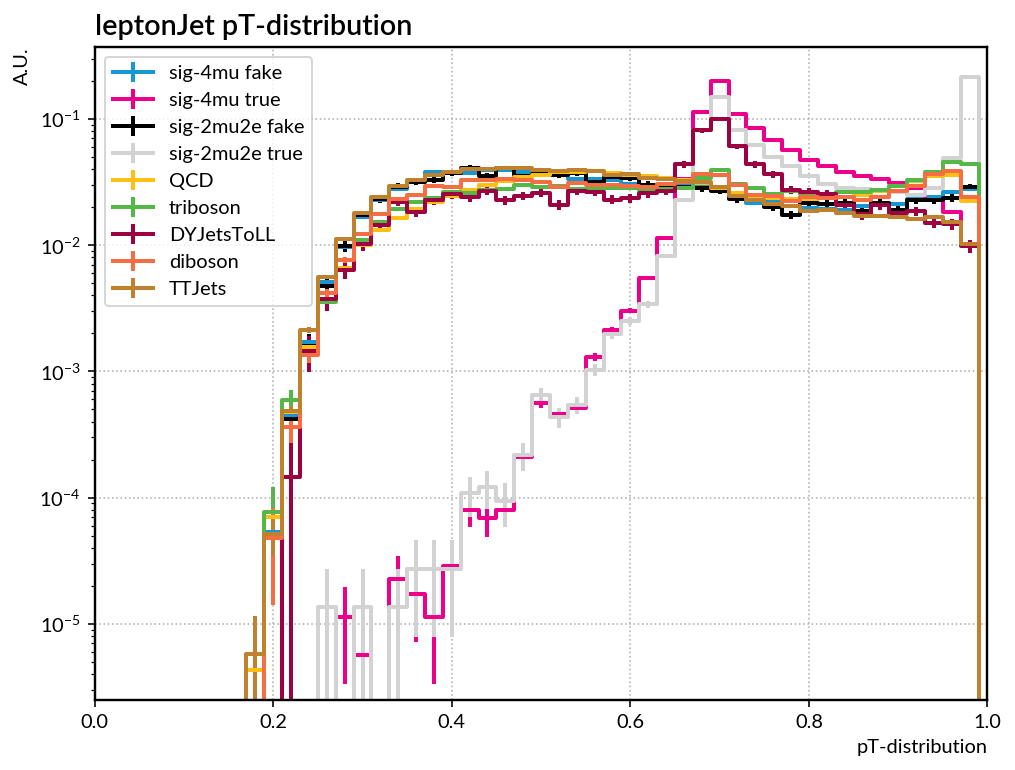

In [15]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hPtd = Hist(bin('x', 50, 0, 1))

hs['sig-4mu fake'  ] = uhh.MultiFill(hPtd, loadedSig, 'ptdist_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hPtd, loadedSig, 'ptdist_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hPtd, loadedSig, 'ptdist_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hPtd, loadedSig, 'ptdist_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hPtd, loadedBkg, 'ptspread', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='pT-distribution',
    ylabel='A.U.',
    title='leptonJet pT-distribution'
);

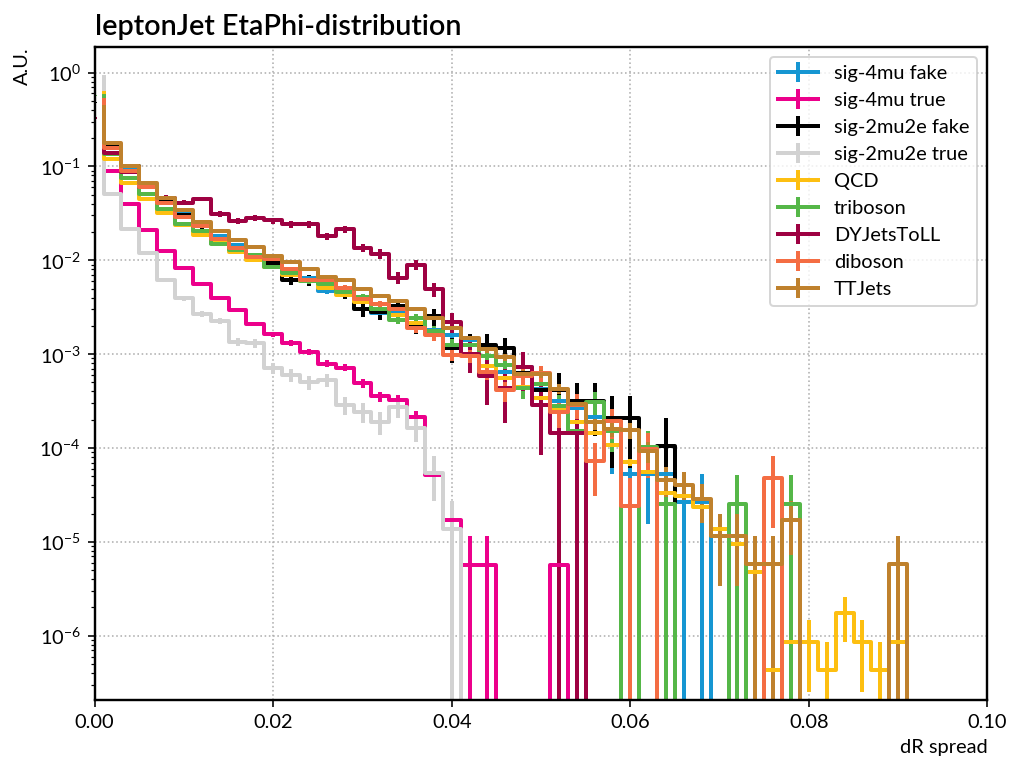

In [16]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hPtd = Hist(bin('x', 50, 0, 0.1))

hs['sig-4mu fake'  ] = uhh.MultiFill(hPtd, loadedSig, 'drspread_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hPtd, loadedSig, 'drspread_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hPtd, loadedSig, 'drspread_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hPtd, loadedSig, 'drspread_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hPtd, loadedBkg, 'drspread', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='dR spread',
    ylabel='A.U.',
    title='leptonJet EtaPhi-distribution'
);

### [jetsub] $\lambda, \epsilon$ | pT,energy distribution

In [17]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        self['lambda_u'] = lambda: t['pfjet_subjet_lambda'].array()[jetUnmatchedMask][self.mHLT]
        self['lambda_m'] = lambda: t['pfjet_subjet_lambda'].array()[jetMatchIdx][self.mHLT]
        self['epsilon_u'] = lambda: t['pfjet_subjet_epsilon'].array()[jetUnmatchedMask][self.mHLT]
        self['epsilon_m'] = lambda: t['pfjet_subjet_epsilon'].array()[jetMatchIdx][self.mHLT]
    
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        self['lambda'] = lambda: t['pfjet_subjet_lambda'].array()[self.mHLT]
        self['epsilon'] = lambda: t['pfjet_subjet_epsilon'].array()[self.mHLT]

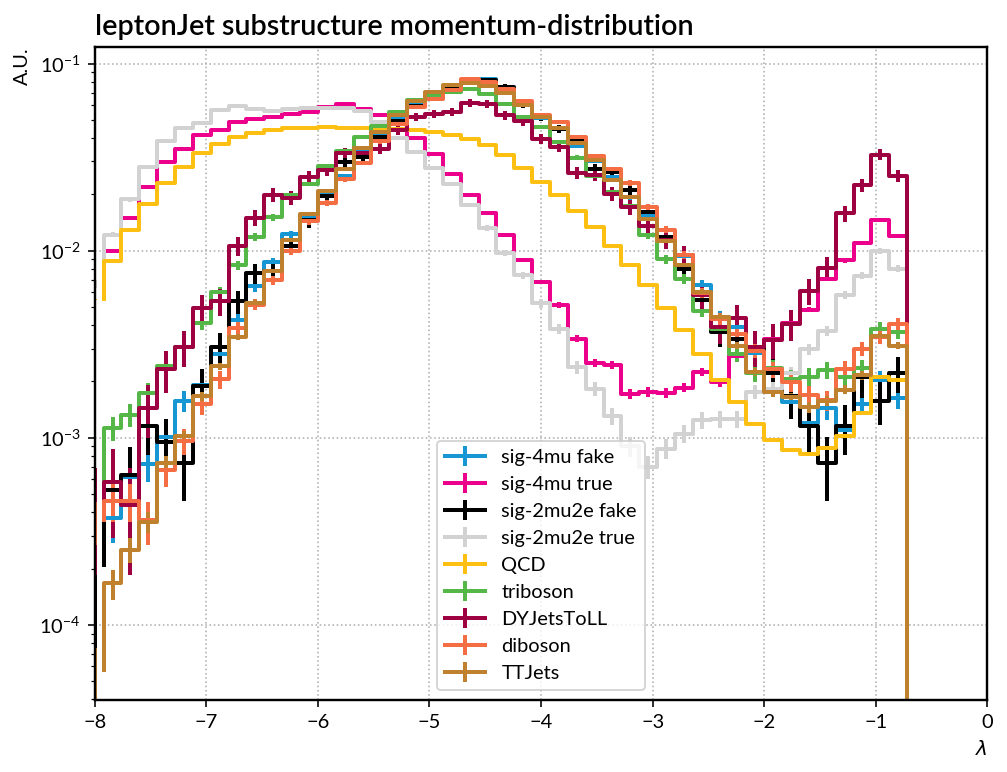

In [18]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hDist = Hist(bin('x', 50, -8, 0))

hs['sig-4mu fake'  ] = uhh.MultiFill(hDist, loadedSig, 'lambda_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hDist, loadedSig, 'lambda_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hDist, loadedSig, 'lambda_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hDist, loadedSig, 'lambda_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hDist, loadedBkg, 'lambda', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='$\lambda$',
    ylabel='A.U.',
    title='leptonJet substructure momentum-distribution'
);

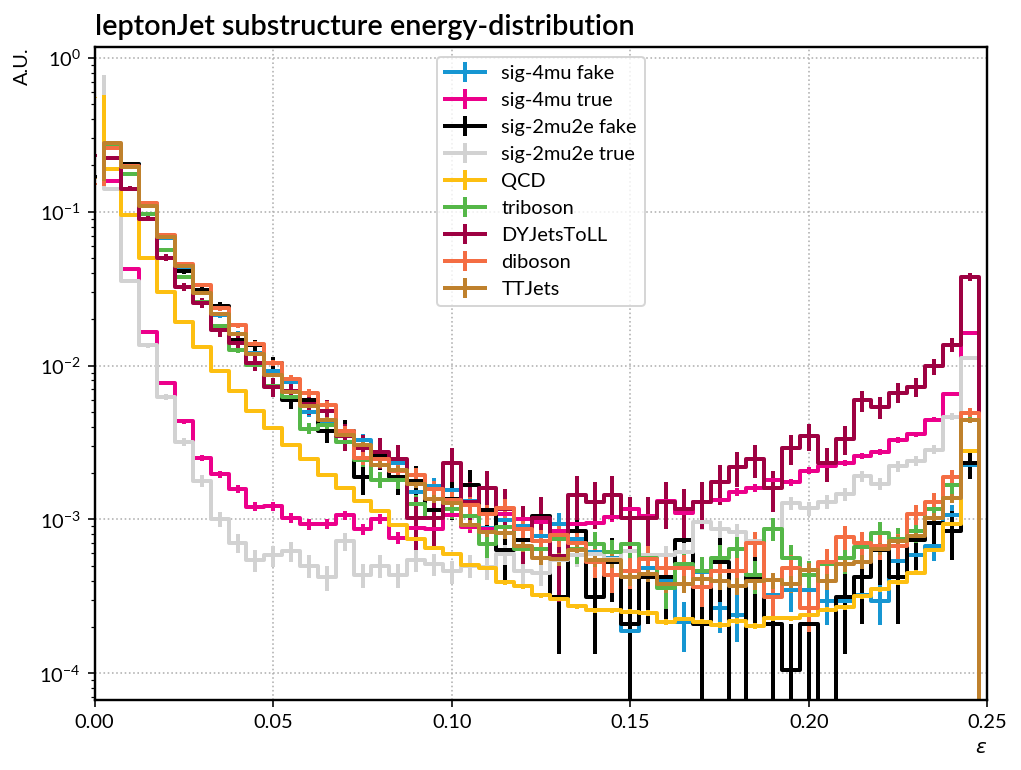

In [19]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hDist = Hist(bin('x', 50, 0, 0.25))

hs['sig-4mu fake'  ] = uhh.MultiFill(hDist, loadedSig, 'epsilon_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hDist, loadedSig, 'epsilon_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hDist, loadedSig, 'epsilon_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hDist, loadedSig, 'epsilon_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hDist, loadedBkg, 'epsilon', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='$\epsilon$',
    ylabel='A.U.',
    title='leptonJet substructure energy-distribution'
);

### [jetsub] Energy correlation function variables {e1, e2, e3}

In [20]:
class loadedSig(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        genp4 = uuh.p4Array(t['gen_p4'])
        mDarkPhoton = t['gen_pid'].array()==32
        jetp4 = uuh.p4Array(t['pfjet_p4'])
        genMatchIdx, jetMatchIdx = uuh.IndexArraysFromMatching(genp4[mDarkPhoton], jetp4)
        jetUnmatchedMask = ~uuh.MaskArrayFromIndexArray(jetMatchIdx, jetp4)
        
        self['e1_u'] = lambda: t['pfjet_subjet_ecf1'].array()[jetUnmatchedMask][self.mHLT]
        self['e1_m'] = lambda: t['pfjet_subjet_ecf1'].array()[jetMatchIdx][self.mHLT]
        self['e2_u'] = lambda: t['pfjet_subjet_ecf2'].array()[jetUnmatchedMask][self.mHLT]
        self['e2_m'] = lambda: t['pfjet_subjet_ecf2'].array()[jetMatchIdx][self.mHLT]
        self['e3_u'] = lambda: t['pfjet_subjet_ecf3'].array()[jetUnmatchedMask][self.mHLT]
        self['e3_m'] = lambda: t['pfjet_subjet_ecf3'].array()[jetMatchIdx][self.mHLT]
        
class loadedBkg(uhh.ffLoader):
    def __init__(self, filename):
        super().__init__(filename)
        t = self.tree
        self['e1'] = lambda: t['pfjet_subjet_ecf1'].array()[self.mHLT]
        self['e2'] = lambda: t['pfjet_subjet_ecf2'].array()[self.mHLT]
        self['e3'] = lambda: t['pfjet_subjet_ecf3'].array()[self.mHLT]

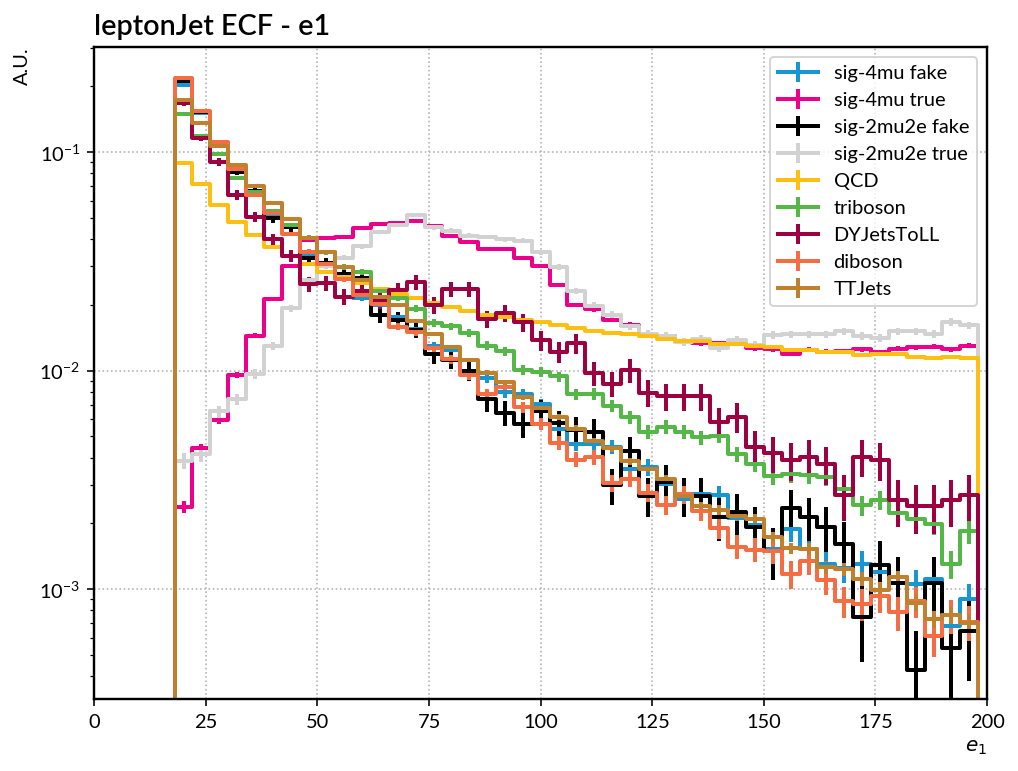

In [21]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hDist = Hist(bin('x', 50, 0, 200))

hs['sig-4mu fake'  ] = uhh.MultiFill(hDist, loadedSig, 'e1_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hDist, loadedSig, 'e1_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hDist, loadedSig, 'e1_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hDist, loadedSig, 'e1_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hDist, loadedBkg, 'e1', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='$e_1$',
    ylabel='A.U.',
    title='leptonJet ECF - e1'
);

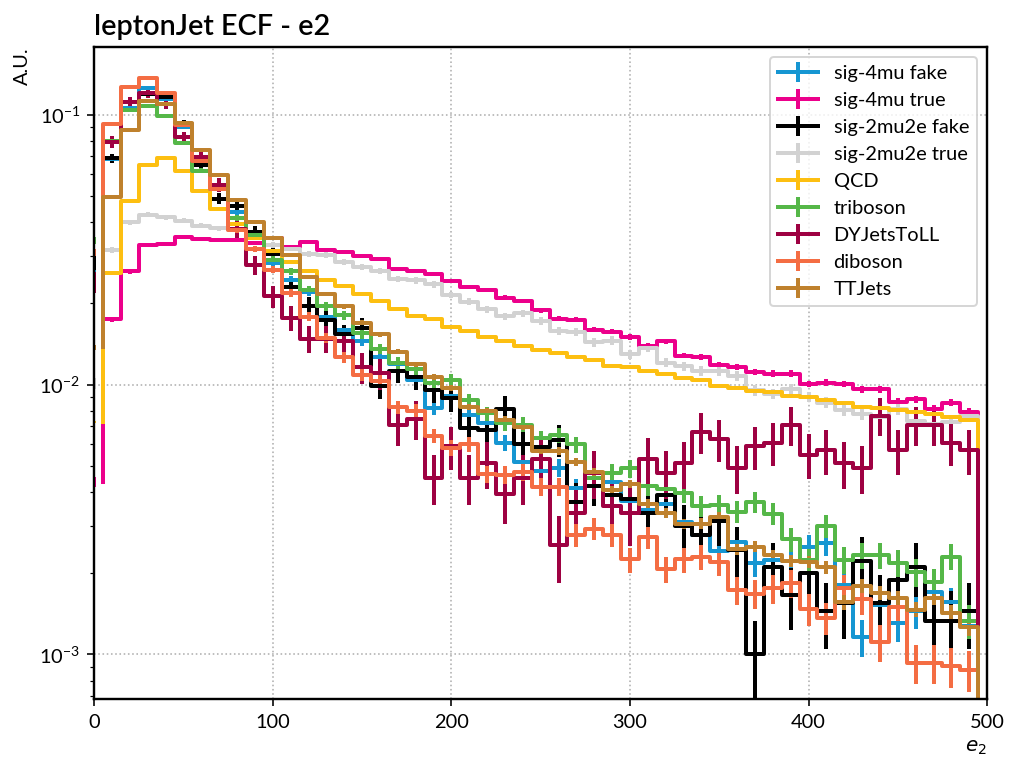

In [22]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hDist = Hist(bin('x', 50, 0, 500))

hs['sig-4mu fake'  ] = uhh.MultiFill(hDist, loadedSig, 'e2_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hDist, loadedSig, 'e2_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hDist, loadedSig, 'e2_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hDist, loadedSig, 'e2_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hDist, loadedBkg, 'e2', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='$e_2$',
    ylabel='A.U.',
    title='leptonJet ECF - e2'
);

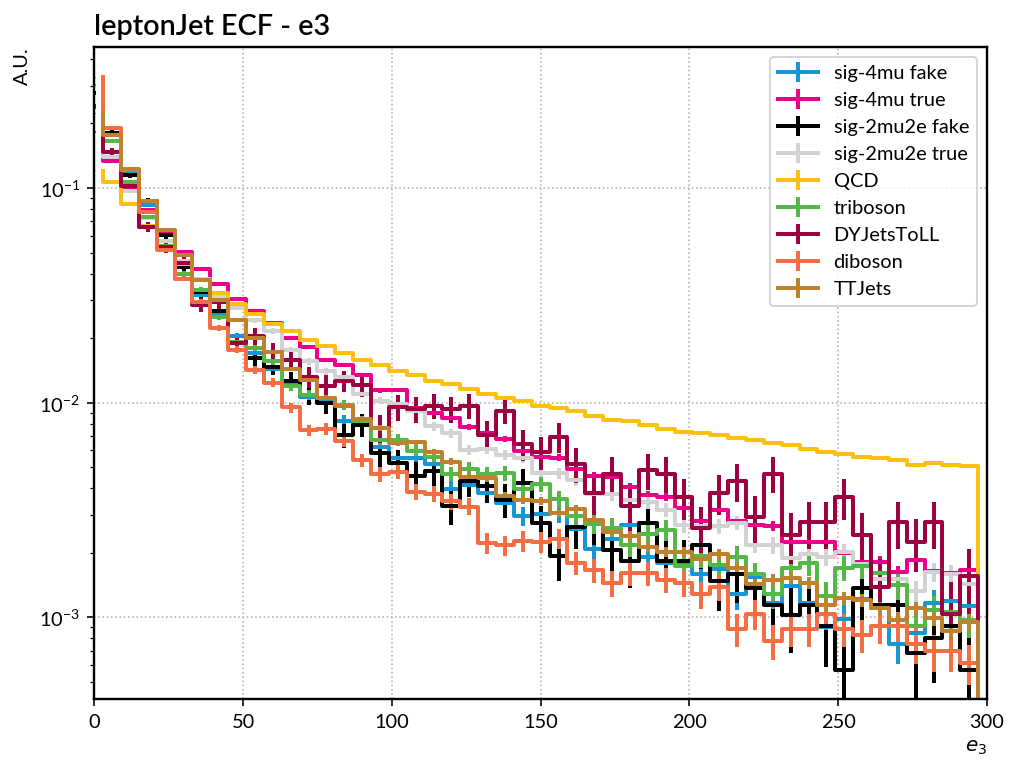

In [23]:
hs = dict()
def doFill(d): return d.flatten()
fig, ax = plt.subplots(figsize=(8,6))
hDist = Hist(bin('x', 50, 0, 300))

hs['sig-4mu fake'  ] = uhh.MultiFill(hDist, loadedSig, 'e3_u', doFill, sigfs4mu)
hs['sig-4mu true'  ] = uhh.MultiFill(hDist, loadedSig, 'e3_m', doFill, sigfs4mu)
hs['sig-2mu2e fake'] = uhh.MultiFill(hDist, loadedSig, 'e3_u', doFill, sigfs2mu2e)
hs['sig-2mu2e true'] = uhh.MultiFill(hDist, loadedSig, 'e3_m', doFill, sigfs2mu2e)

for k in BkgStore.keys():
    hs[k] = reduce(
        lambda a, b: a+b,
        [
            uhh.MultiFill(hDist, loadedBkg, 'e3', doFill, filelist, weight=w) 
            for filelist, w in BkgStore[k]
        ]
    )
    
uhh.OverlayHisto(
    hs, ax,
    xlabel='$e_3$',
    ylabel='A.U.',
    title='leptonJet ECF - e3'
);

----